## Tushar Goyal - B18030 - Tushar Goyal- CSE

## Dominant Color Extraction and  Image segmentation - Classification of an image into different groups

- __one of the most popular methods is K-Means clustering algorithm__
- __The goal of Image segmentation is to change the representation of an image into something that is more meaningful and easier to analyze__

K-Means clustering algorithm is an unsupervised algorithm and it is __used to segment the interest area from the background__. It clusters, or partitions the given data into K-clusters or parts based on the K-centroids.
The algorithm is used when you have unlabeled data(i.e. data without defined categories or groups). The goal is to find certain groups based on some kind of similarity in the data with the number of groups represented by K.

• Given k, the k-means algorithm works as follows:
1. Choose k (random) data points (seeds) to be the initial
centroids, cluster centers
2. Assign each data point to the closest centroid
3. Re-compute the centroids using the current cluster
memberships
4. If a convergence criterion is not met, repeat steps 2 and 3

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

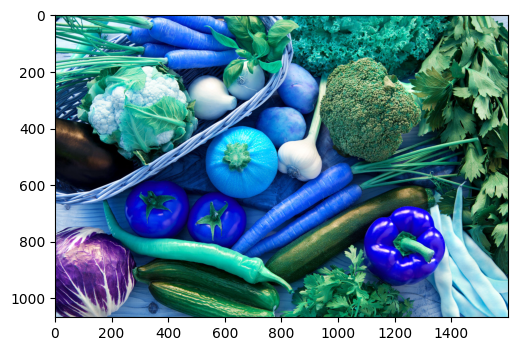

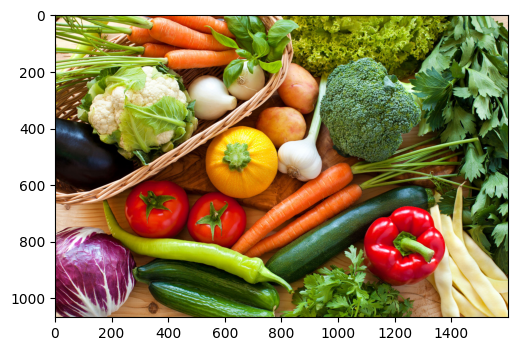

In [2]:
original_image = cv2.imread("Image.jpg")
# original_image = cv2.imread("image_t.jpg")

img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
# cv2.imshow(img)
plt.figure(dpi=100)
plt.imshow(original_image)
plt.show()
plt.figure(dpi=100)
plt.imshow(img)
plt.show()


## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

**Choosing K can be a bit of an art, because it depends on what
kind of structure you’re looking for**. Sometimes you might know how many clusters there are in
advance. Other times, you might want to “oversegment” or “undersegment” the data, depending
on whether you’d like to end up with many clusters or just a few. In the compression view of
clustering, this boils down to asking whether you’d like a more compressed representation that
loses information (smaller K), or a less compressed representation that keeps more information
about your data (larger K). **If you’re using K-Means for learning a feature representation, it’s
usually a good idea to use a larger K. If you want to interpret the groups, then perhaps you want
to go with a smaller K**

In [3]:
original_shape=img.shape

In [4]:
original_shape

(1067, 1600, 3)

In [5]:
image = cv2.resize(img, (500,500))

Text(0.5, 1.0, 'Reshaped Original image to work on It')

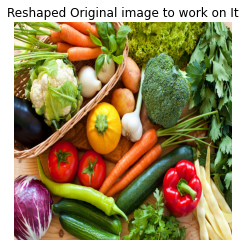

In [6]:
plt.axis('off')
plt.imshow(image)
plt.title('Reshaped Original image to work on It')
# plt.savefig('Reshaped_original_image.png')

In [7]:
shape_image=image.shape

In [8]:
print(shape_image)

(500, 500, 3)


In [9]:
all_pixels=image.reshape((-1,3))
all_pixels[0]
type(all_pixels[0])

numpy.ndarray

In [10]:
all_pixels.shape

(250000, 3)

K-means **convergence** (stopping) **criterion**

1.   no (or minimum) re-assignments of data points to different clusters,
2.   no (or minimum) change of centroids, or
3.   minimum decrease in the sum of squared error (SSE)

In [11]:
from sklearn.cluster import KMeans
dominant_colors = 4

kmean = KMeans(n_clusters=dominant_colors)
kmean.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
centers = kmean.cluster_centers_
# these center coordinates may also be in fraction so converting the datatype to integer, clearly the values will be from 0-255 so datatype uint8
centers = np.array(centers,dtype='uint8')
print(centers)

[[ 57  51  14]
 [210 205 164]
 [133 148  51]
 [195  66  26]]


![picture](https://drive.google.com/uc?id=1eHoHk5qx9aLes2dbtG98lqvf6lJ_njBl)

• Despite weaknesses, k-means is still the most
popular algorithm due to its simplicity and
efficiency

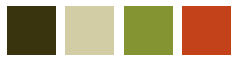

In [13]:
i = 1
plt.figure(0,figsize=(4,2))
colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

## Segmenting original image
__Concept__ -There are 3 features, R,G,B. So we need to reshape the image to an array of Mx3 size (M is number of pixels in image). And after the clustering, we apply centroid values (it is also R,G,B) to all pixels, such that resulting image will have specified number of colors. And again we need to reshape it back to the shape of original image. Below is the code:

In [14]:
new_img = np.zeros((500*500, 3),dtype='uint8')
print(new_img.shape)

(250000, 3)


In [15]:
colors

[array([57, 51, 14], dtype=uint8),
 array([210, 205, 164], dtype=uint8),
 array([133, 148,  51], dtype=uint8),
 array([195,  66,  26], dtype=uint8)]

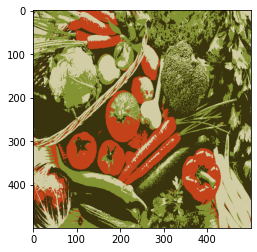

In [16]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[kmean.labels_[ix]]
    
new_img = new_img.reshape((shape_image))
plt.imshow(new_img)


In [17]:
def segmentimage(k,feature,pixels):
    dominant_colors = k
    feat = feature
    kmean = KMeans(n_clusters=dominant_colors)
    kmean.fit(pixels)
    centers = kmean.cluster_centers_
    centers = np.array(centers,dtype='uint8')
    colors = []
    i=0
    # print(centers.shape)

    for each_col in centers:
        i+=1
        # print(each_col[0:3])    
        colors.append(each_col[0:3])    

    new_img = np.zeros((500*500, 3),dtype='uint8')

    for ix in range(new_img.shape[0]):
        new_img[ix] = colors[kmean.labels_[ix]]

    new_img = new_img.reshape((shape_image))
    plt.axis('off')
    plt.title(f'Segmented Image with {dominant_colors} dominant colors and considering {feat} as feature')
    plt.imshow(new_img)

In [18]:
loc  = np.empty((250000,2))
print(loc.shape)
k = 0

for i in range(500):
  for j in range(500):
    loc[k] = np.array([i,j])
    k = k+1

loc_pixelset = np.empty((250000,5))
for i in range(len(loc_pixelset)):
  loc_pixelset[i] = np.append(all_pixels[i],loc[i])

print(loc_pixelset.shape)
250000*5

(250000, 2)
(250000, 5)


1250000

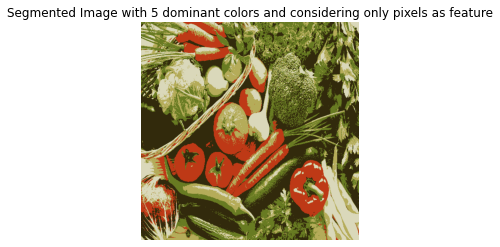

In [19]:
segmentimage(5,"only pixels",all_pixels)


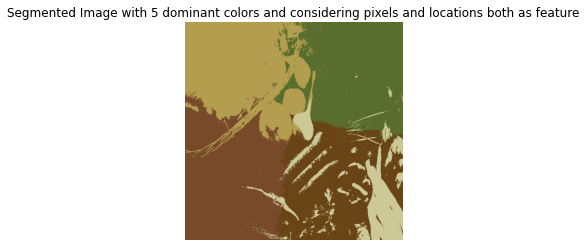

In [20]:
segmentimage(5, "pixels and locations both",loc_pixelset)

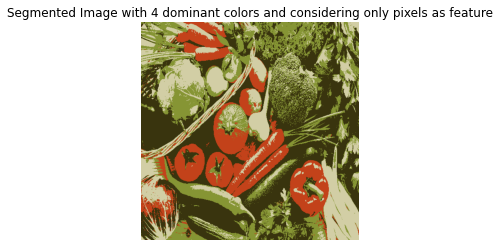

In [21]:
segmentimage(4,"only pixels",all_pixels)


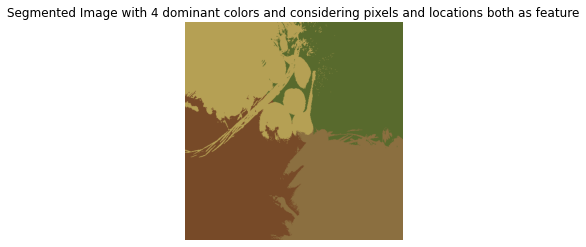

In [22]:
segmentimage(4, "pixels and locations both",loc_pixelset)


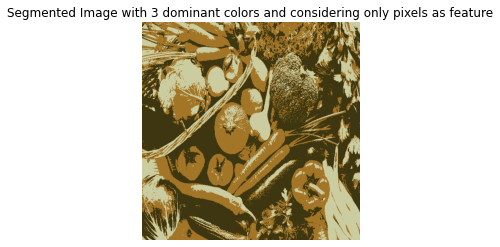

In [23]:
segmentimage(3,"only pixels",all_pixels)


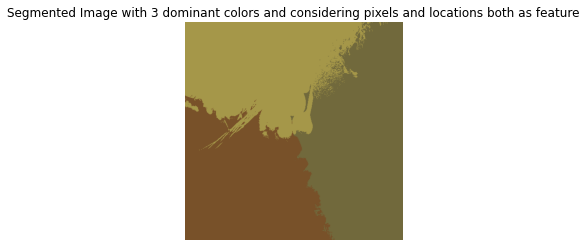

In [24]:
segmentimage(3, "pixels and locations both",loc_pixelset)

**Hard clustering** is about grouping the data items such that each item is only assigned to one cluster.

The distortion function J is a non-convex function, and so coordinate
descent on J is not guaranteed to converge to the global minimum. In other
words, k-means can be susceptible to local optima. Very often k-means will
work fine and come up with very good clusterings despite this. But if you
are worried about getting stuck in bad local minima, one common thing to
do is run k-means many times (using different random initial values for the
cluster centroids µj ). Then, out of all the different clusterings found, pick
the one that gives the lowest distortion

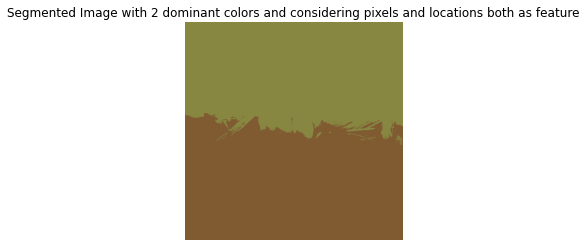

In [25]:
segmentimage(2, "pixels and locations both",loc_pixelset)

 A good clustering will produce high quality
clusters in which:
- the intra-class (that is, intra-cluster) similarity is high
- the inter-class similarity is low
- The measured quality of a clustering depends on both the obj representation and
the similarity measure used

![picture](https://drive.google.com/uc?id=1rGqqsGxfZYAa-XF_UNj_i_5D8gun80nU)


